# Applying Machine Learning for Ball Milling Parameters

In [198]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

- make feret diameter between 40-100 microns 
- plot mean and test with means
- test total run time 
- 20mm scrap to powders 
- shoot for friday 330 - 30 min 
- make slides 
- define definitions 

In [199]:
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label = 'Linear Regression Model')

In [200]:
# import data
ball_milling_data = pd.read_csv('/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/Ball Milling Powder Samples/training ballmilling data.csv')
ball_milling_data = ball_milling_data.loc[(ball_milling_data['Feret'] >= 40) & (ball_milling_data['Feret'] <= 100)]
ball_milling_data.columns

Index(['Tag', 'Ball-Powder Ratio', 'Jar', '20mm Run Time (Hours)',
       '10mm Run Time (Hours)', '6mm Run Time (Hours)',
       'Total Run Time (Hours)', 'Circ.', 'Feret', 'AR', 'Round'],
      dtype='object')

In [201]:
X_train = ball_milling_data[['Circ.']]
y_train= ball_milling_data[['20mm Run Time (Hours)']]

In [207]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

b = lr.intercept_
m = lr.coef_
b

array([23.01170945])

/var/folders/27/_cqkc85s1rz_whsq2n2qsjjr0000gn/T/ipykernel_91851/2112377821.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


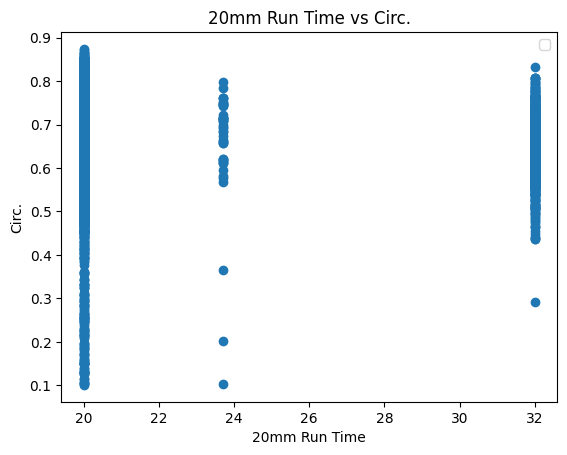

In [213]:

plt.scatter(ball_milling_data['20mm Run Time (Hours)'], ball_milling_data['Circ.'])
#abline(m[0], b[0]) 
plt.xlabel('20mm Run Time')
plt.ylabel('Circ.')
plt.title('20mm Run Time vs Circ.')
plt.legend()

In [154]:
# split data in to x_train and y_train vectors 
X_train = ball_milling_data[['Oxygen (wt%)']]
y_train= ball_milling_data['Reuse Cycles']

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
X_train

,Oxygen (wt%)
0,0.153000
1,0.111000
2,0.152000
3,0.184000
4,0.199667
5,0.116000
6,0.157000
7,0.231500
8,0.000000
9,0.209667


In [155]:
y_pred

array([5.38555869, 4.13609353, 5.35580952, 6.30778298, 6.77385341,
       4.28483938, 5.50455537, 7.72086858, 0.8339356 , 7.07134502,
       0.8339356 , 0.8339356 , 5.44505703, 6.06978961, 6.75402053,
       5.11781615, 5.4748062 , 5.20706367, 5.41530786, 5.59380288,
       4.87982279])

In [156]:
r2_score(y_true=y_train, y_pred=y_pred)

0.374491003706658

In [157]:
b = lr.intercept_
m = lr.coef_

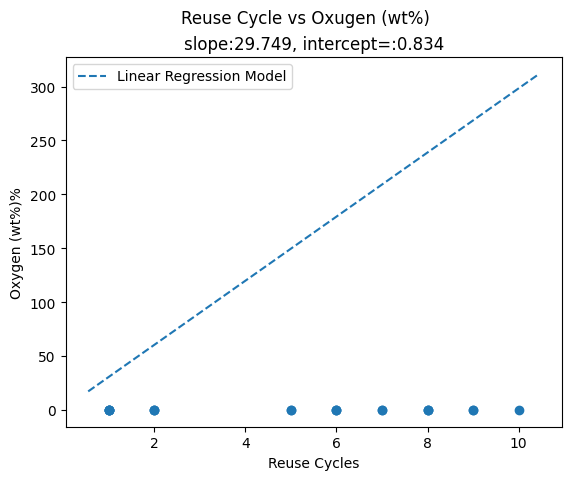

In [158]:
plt.scatter(ball_milling_data['Reuse Cycles'], ball_milling_data['Oxygen (wt%)'])
abline(m, b) 
plt.xlabel('Reuse Cycles')
plt.ylabel('Oxygen (wt%)%')
plt.suptitle('Reuse Cycle vs Oxugen (wt%)')
plt.title(f'slope:{m[0]:.3f}, intercept=:{b:.3f}')
plt.legend()

In [159]:
# show predictionrs 
predictions = pd.DataFrame({'Reuse Cycles': ball_milling_data['Reuse Cycles'],
                            'Oxygen (wt%)':ball_milling_data['Oxygen (wt%)'],
                            'Regression Model Prediction for Oxygen':y_pred})

predictions

,Reuse Cycles,Oxygen (wt%),Regression Model Prediction for Oxygen
0,1.0,0.153000,5.385559
1,2.0,0.111000,4.136094
2,8.0,0.152000,5.355810
3,10.0,0.184000,6.307783
4,8.0,0.199667,6.773853
5,1.0,0.116000,4.284839
6,1.0,0.157000,5.504555
7,8.0,0.231500,7.720869
8,1.0,0.000000,0.833936
9,7.0,0.209667,7.071345


Text(0.5, 0.98, 'Scatter Plot of Actual Oxygen (wt%) Values vs.Linear Regression Predicted Oxygen (wt%) Values')

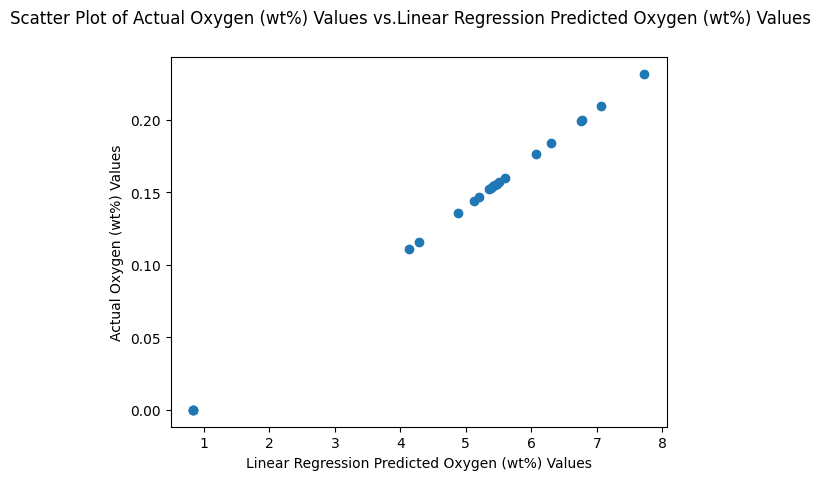

In [160]:
plt.scatter( predictions['Regression Model Prediction for Oxygen'], predictions['Oxygen (wt%)'])
plt.ylabel('Actual Oxygen (wt%) Values')
plt.xlabel('Linear Regression Predicted Oxygen (wt%) Values')
plt.suptitle('Scatter Plot of Actual Oxygen (wt%) Values vs.Linear Regression Predicted Oxygen (wt%) Values')

In [161]:
# split data in to x_train and y_train vectors 
X_train = ball_milling_data.drop(columns=['Round','Total Run Time (Hours)', 'Tag', 'Ball to Powder Weight Ratio', 'Jar','AR','Feret','Circ.'])
y_train= ball_milling_data['Feret']

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
lr.coef_

X_train

KeyError: "['Total Run Time (Hours)', 'Tag', 'Ball to Powder Weight Ratio', 'Jar'] not found in axis"

In [1315]:
r2_score(y_true=y_train, y_pred=y_pred)

0.8565232619596064

In [1316]:
# show predictionrs 
predictions = pd.DataFrame({'20mm Run Time (Hours)': ball_milling_data['20 mm Run Time (Hours)'],
                            '10mm Run Time (Hours)': ball_milling_data['10 mm Run Time (Hours)'],
                            '6mm Run Time (Hours)': ball_milling_data['6 mm Run Time (Hours)'],
                            'AR':ball_milling_data['AR'],
                            'Regression Model Prediction for AR':y_pred})

predictions

,20mm Run Time (Hours),10mm Run Time (Hours),6mm Run Time (Hours),AR,Regression Model Prediction for AR
0,20.000000,0.000000,0.000000,1.449283,73.254708
1,20.000000,0.000000,0.000000,1.826924,73.254708
2,32.000000,16.000000,0.000000,1.540223,53.436362
3,32.000000,8.000000,0.000000,1.425481,63.921914
4,32.000000,0.000000,0.000000,1.455622,74.407465
5,23.666667,0.000000,0.000000,1.675362,73.606939
6,20.000000,16.666667,0.000000,1.438180,51.409808
7,20.000000,25.000000,8.333333,1.400638,45.896174
8,20.000000,25.000000,8.333333,1.464421,45.896174
9,20.000000,16.666667,0.000000,2.848661,51.409808


Text(0.5, 1.0, 'Predicted Utilizing all 3 Run Time parameters')

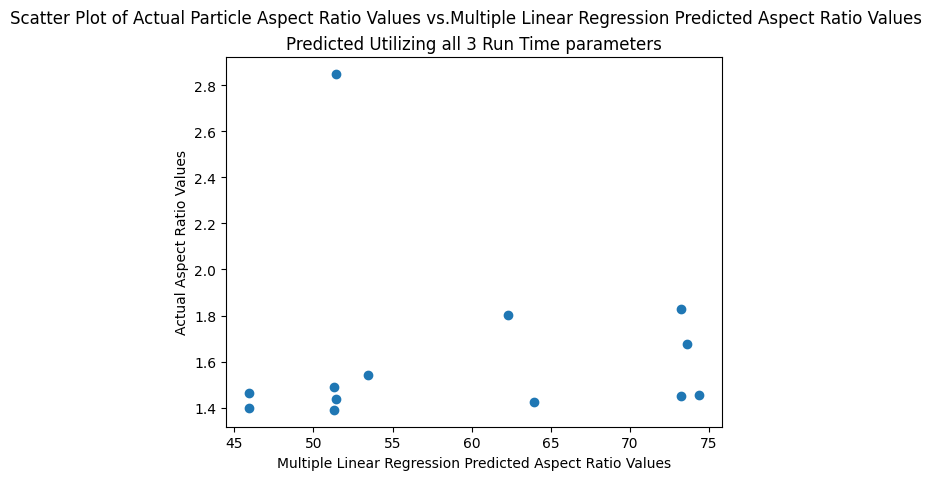

In [1317]:
plt.scatter( predictions['Regression Model Prediction for AR'], predictions['AR'])
plt.ylabel('Actual Aspect Ratio Values')
plt.xlabel('Multiple Linear Regression Predicted Aspect Ratio Values')
plt.suptitle('Scatter Plot of Actual Particle Aspect Ratio Values vs.Multiple Linear Regression Predicted Aspect Ratio Values')
plt.title('Predicted Utilizing all 3 Run Time parameters')

In [1318]:
# import data
ball_milling_data = pd.read_excel('/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/ALM Ortho Powders/ALM Ortho Powder Data Prepared for Professor Kordijazi.xlsx')
ball_milling_data = ball_milling_data.loc[(ball_milling_data['Feret'] >= 40) & (ball_milling_data['Feret'] <= 100)]
ball_milling_data = ball_milling_data.drop(columns=['Unnamed: 29', 'Unnamed: 30'])
ball_milling_data = ball_milling_data.dropna()
ball_milling_data

,Lot,GroupID,Reuse Cycles,Area,X,Y,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Aluminum (wt%),Iron (wt%),Oxygen (wt%),Vanadium (wt%)
0,P2002,6.0,1.0,2741.358617,612.083774,462.138346,201.783144,582.758505,432.672616,58.696598,...,465.120468,81.943520,57.084611,1.054284,0.953426,0.961663,6.43,0.200,0.153000,3.97
1,P2328,2.0,2.0,3483.014884,623.213855,457.643020,228.862552,590.063396,424.432745,66.282249,...,460.267916,85.165910,63.684635,1.098306,0.934873,0.960718,6.44,0.230,0.111000,4.01
2,P1444,2.0,8.0,1106.340000,716.588600,430.541940,137.780100,696.900000,411.400000,39.740000,...,432.700000,77.504660,35.826420,1.555760,0.863800,0.923800,6.42,0.200,0.152000,4.14
3,P1444,1.0,10.0,2616.907526,620.511046,471.900587,195.344651,591.995217,443.235013,57.081314,...,474.344069,83.551543,55.659853,1.051948,0.955940,0.963416,6.42,0.220,0.184000,4.14
4,P1444,1.0,8.0,2850.982368,615.476783,463.960029,203.790224,585.727109,434.076337,59.531958,...,467.418754,81.840607,58.213274,1.043691,0.961093,0.965017,6.42,0.195,0.199667,4.01
5,P2002,3.0,1.0,2969.685697,621.823334,462.726148,209.681230,591.354205,432.053407,60.919583,...,466.151013,81.209915,59.350943,1.066824,0.954335,0.963608,6.41,0.190,0.116000,3.95
6,P2002,11.0,1.0,3091.652126,626.123556,451.828864,214.029604,594.935305,420.595933,62.381516,...,454.528281,84.709390,59.996035,1.074866,0.938501,0.961358,6.43,0.190,0.157000,3.92
7,P1442,1.0,8.0,2904.701955,625.550119,474.865208,206.684650,595.462576,444.576534,60.215442,...,476.932906,83.795871,59.086640,1.040637,0.964261,0.965607,6.43,0.180,0.231500,4.05
8,P2001,1.0,1.0,3240.073354,640.030793,460.667568,220.456380,608.066458,428.624451,63.991850,...,463.252665,84.723189,61.478033,1.088094,0.937236,0.963088,0.00,0.000,0.000000,0.00
9,P1440,2.0,7.0,2832.380692,613.834266,464.889542,203.391612,584.167147,435.061095,59.341210,...,468.158501,80.892946,58.014638,1.047195,0.958503,0.964580,6.34,0.170,0.209667,3.98


In [1319]:
# split data in to x_train and y_train vectors 
X_train = ball_milling_data.drop(columns=['Lot', 'GroupID', 'Area', 'X', 'Y', 'Perim.', 'BX',
       'BY', 'Width', 'Height', 'Major', 'Minor', 'Angle', 'Circ.', 'Feret',
       'IntDen', 'RawIntDen', 'FeretX', 'FeretY', 'FeretAngle', 'MinFeret',
       'AR', 'Round', 'Solidity', 'Aluminum (wt%)', 'Iron (wt%)',
       'Oxygen (wt%)', 'Vanadium (wt%)'])
y_train= ball_milling_data['Feret']
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

In [1320]:
r2_score(y_true=y_train, y_pred=y_pred)

0.22996502649592265

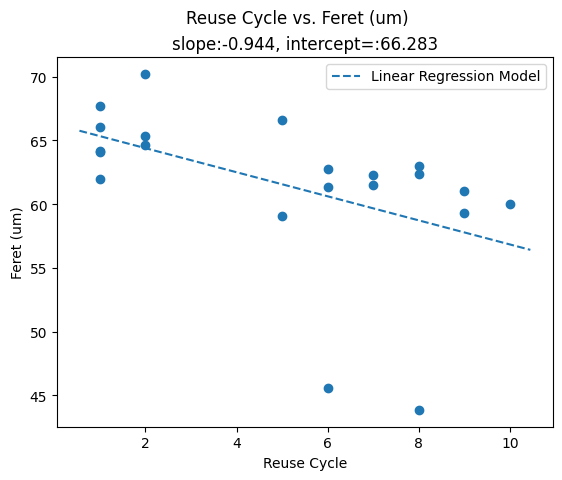

In [1321]:
b = lr.intercept_
m = lr.coef_
plt.scatter(ball_milling_data['Reuse Cycles'], ball_milling_data['Feret'])
abline(m, b) 
plt.ylabel('Feret (um)')
plt.xlabel('Reuse Cycle')
plt.suptitle('Reuse Cycle vs. Feret (um)')
plt.title(f'slope:{m[0]:.3f}, intercept=:{b:.3f}')
plt.legend()

In [1322]:
# show predictionrs 
predictions = pd.DataFrame({'Reuse Cycle': ball_milling_data['Reuse Cycles'],
                            'Feret':ball_milling_data['Feret'],
                            'Regression Model Prediction for Feret':y_pred})

predictions

,Reuse Cycle,Feret,Regression Model Prediction for Feret
0,1.0,61.977651,65.338701
1,2.0,70.219536,64.394767
2,8.0,43.861800,58.731165
3,10.0,60.021853,56.843297
4,8.0,62.344761,58.731165
5,1.0,64.090463,65.338701
6,1.0,66.073446,65.338701
7,8.0,62.965749,58.731165
8,1.0,67.682244,65.338701
9,7.0,62.258105,59.675099


Text(0.5, 0.98, 'Scatter Plot of Actual Particle Feret Values vs.Multiple Linear Regression Predicted Feret Values')

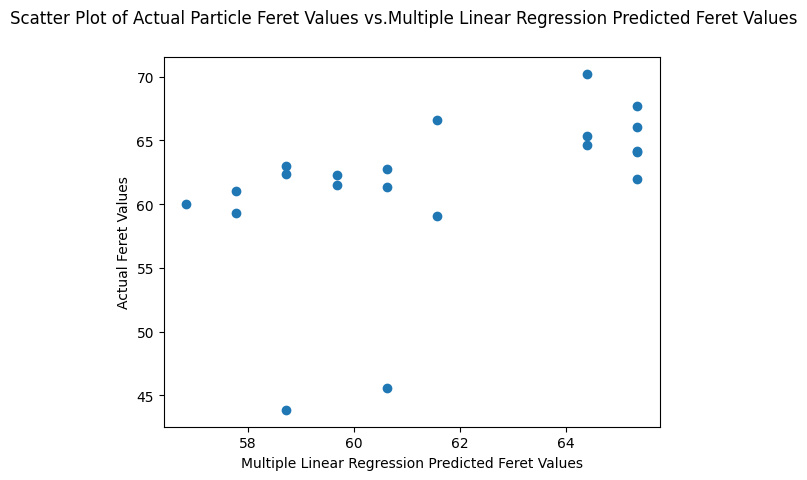

In [1323]:
plt.scatter( predictions['Regression Model Prediction for Feret'], predictions['Feret'])
plt.ylabel('Actual Feret Values')
plt.xlabel('Multiple Linear Regression Predicted Feret Values')
plt.suptitle('Scatter Plot of Actual Particle Feret Values vs.Multiple Linear Regression Predicted Feret Values')